In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import sys


In [3]:
### Read the data of  pokemon which is structured data from the Excel file
df = pd.read_excel("pokemon_data.xlsx")

In [4]:
df.head(3)

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,weakness,next_evolution,prev_evolution
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"Grass, Poison",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.690,69.0,20:00,"Fire, Ice, Flying, Psychic","002: Ivysaur, 003: Venusaur",NaN
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"Grass, Poison",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.042,4.2,07:00,"Fire, Ice, Flying, Psychic",003: Venusaur,001: Bulbasaur
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"Grass, Poison",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.017,1.7,11:30,"Fire, Ice, Flying, Psychic",NaN,"001: Bulbasaur, 002: Ivysaur"


In [5]:
# Get all Pokemons whose spawn rate is less than 5%
spawn_rate_less_than_5 = df[df['spawn_chance'] < 5]

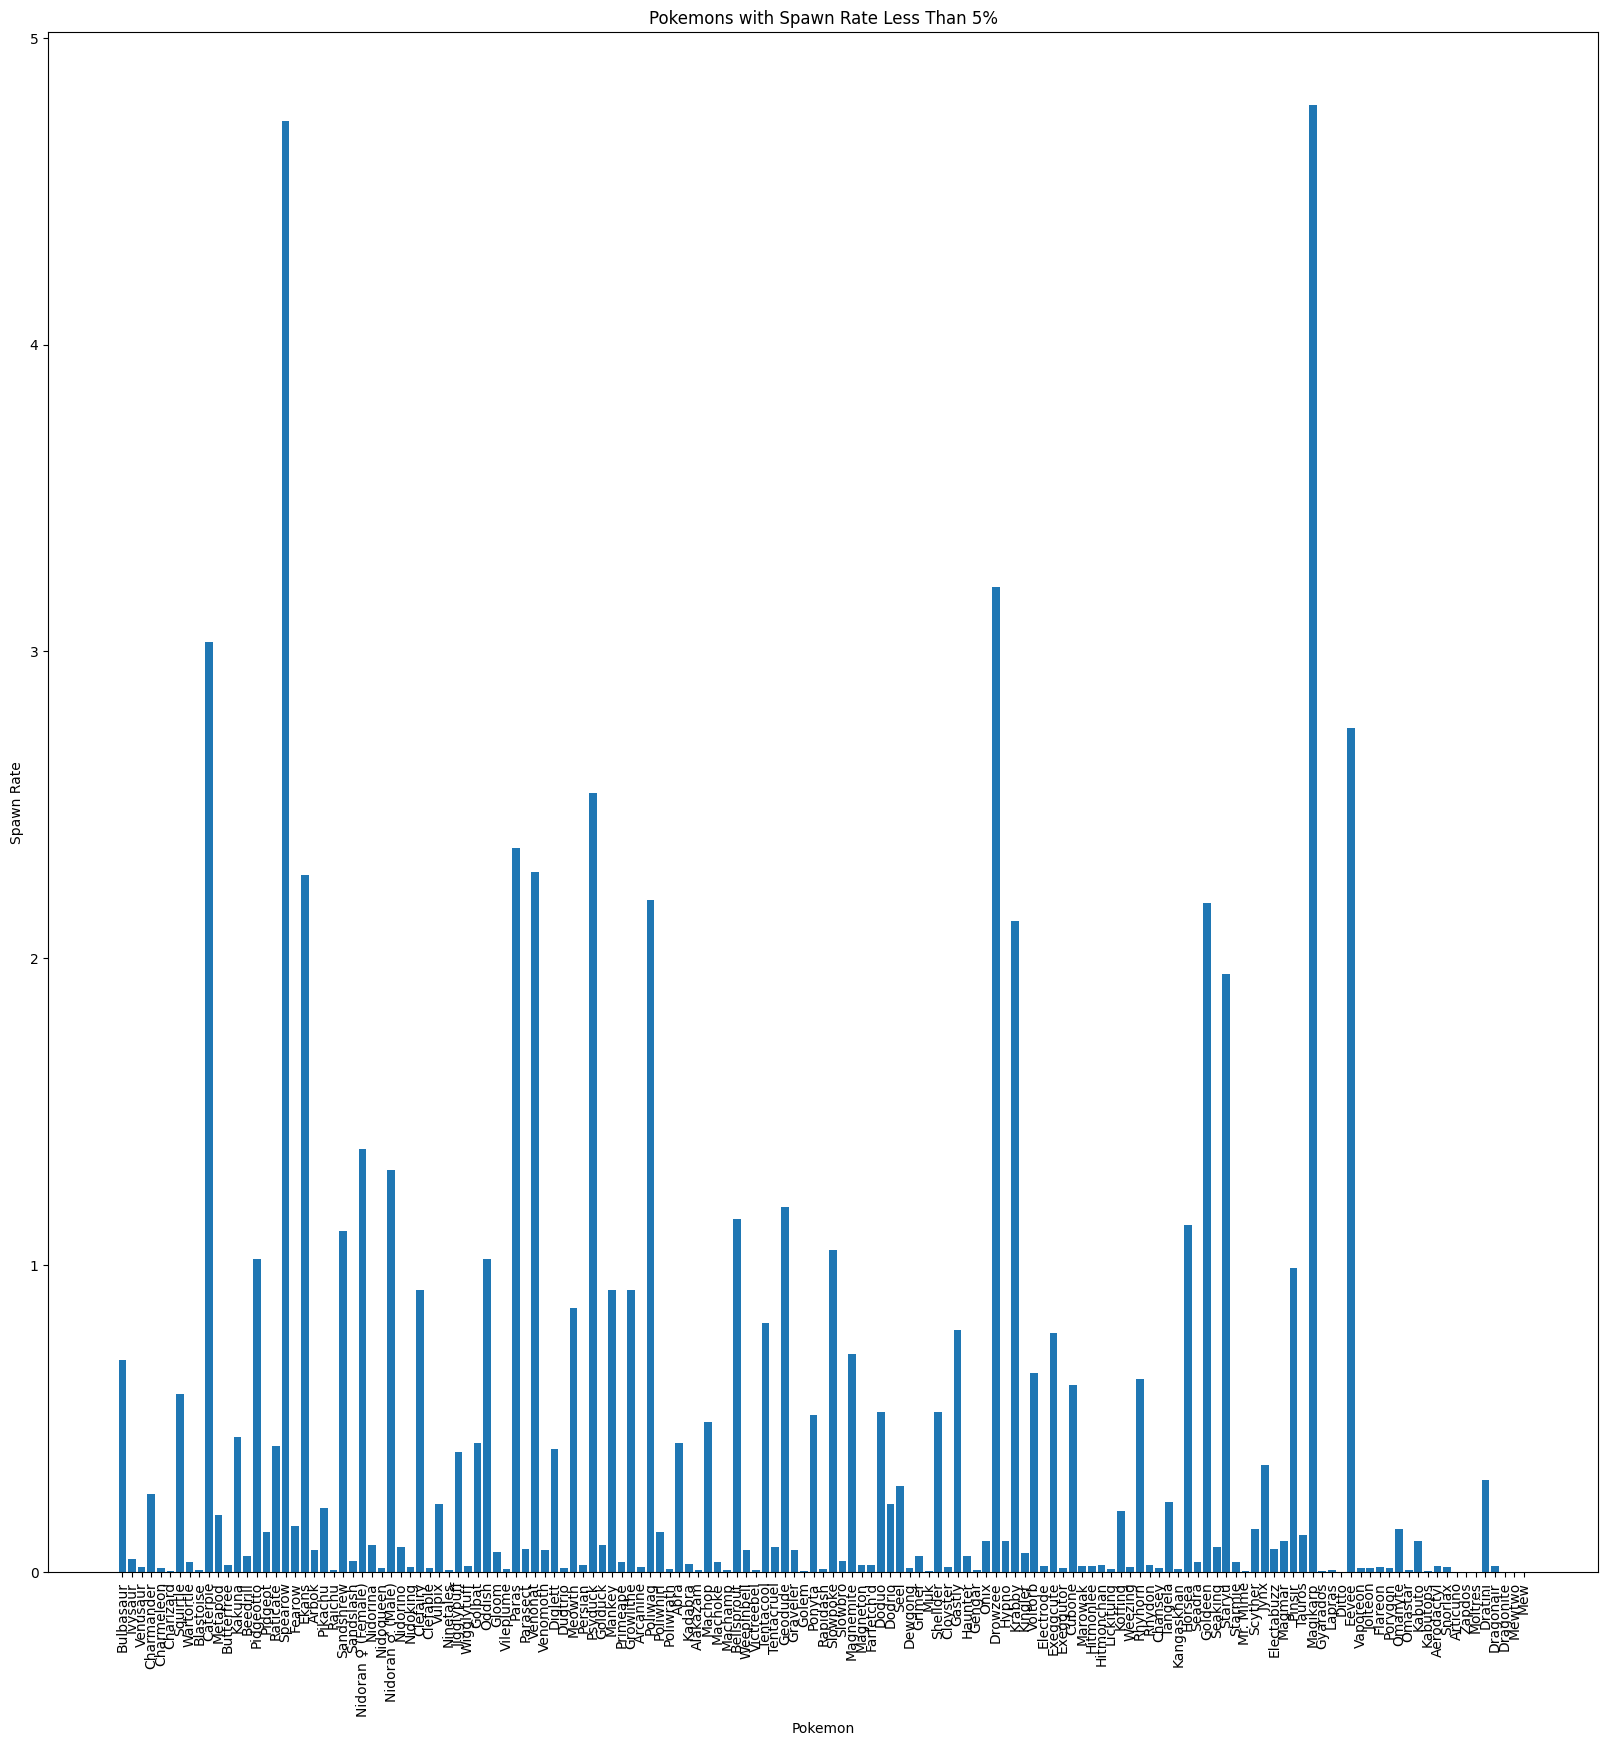

In [6]:
# Plotting the analysis

# Bar plot for spawn rate less than 5%
plt.figure(figsize=(20, 20))
plt.bar(spawn_rate_less_than_5['name'], spawn_rate_less_than_5['spawn_chance'])
plt.xlabel('Pokemon')
plt.ylabel('Spawn Rate')
plt.title('Pokemons with Spawn Rate Less Than 5%')
plt.xticks(rotation=90)
plt.show()
print("")

In [10]:
 #Get all Pokemons that have less than 4 weaknesses
weakness_less_than_4 = df[df['weakness'].str.count(',')  < 4]

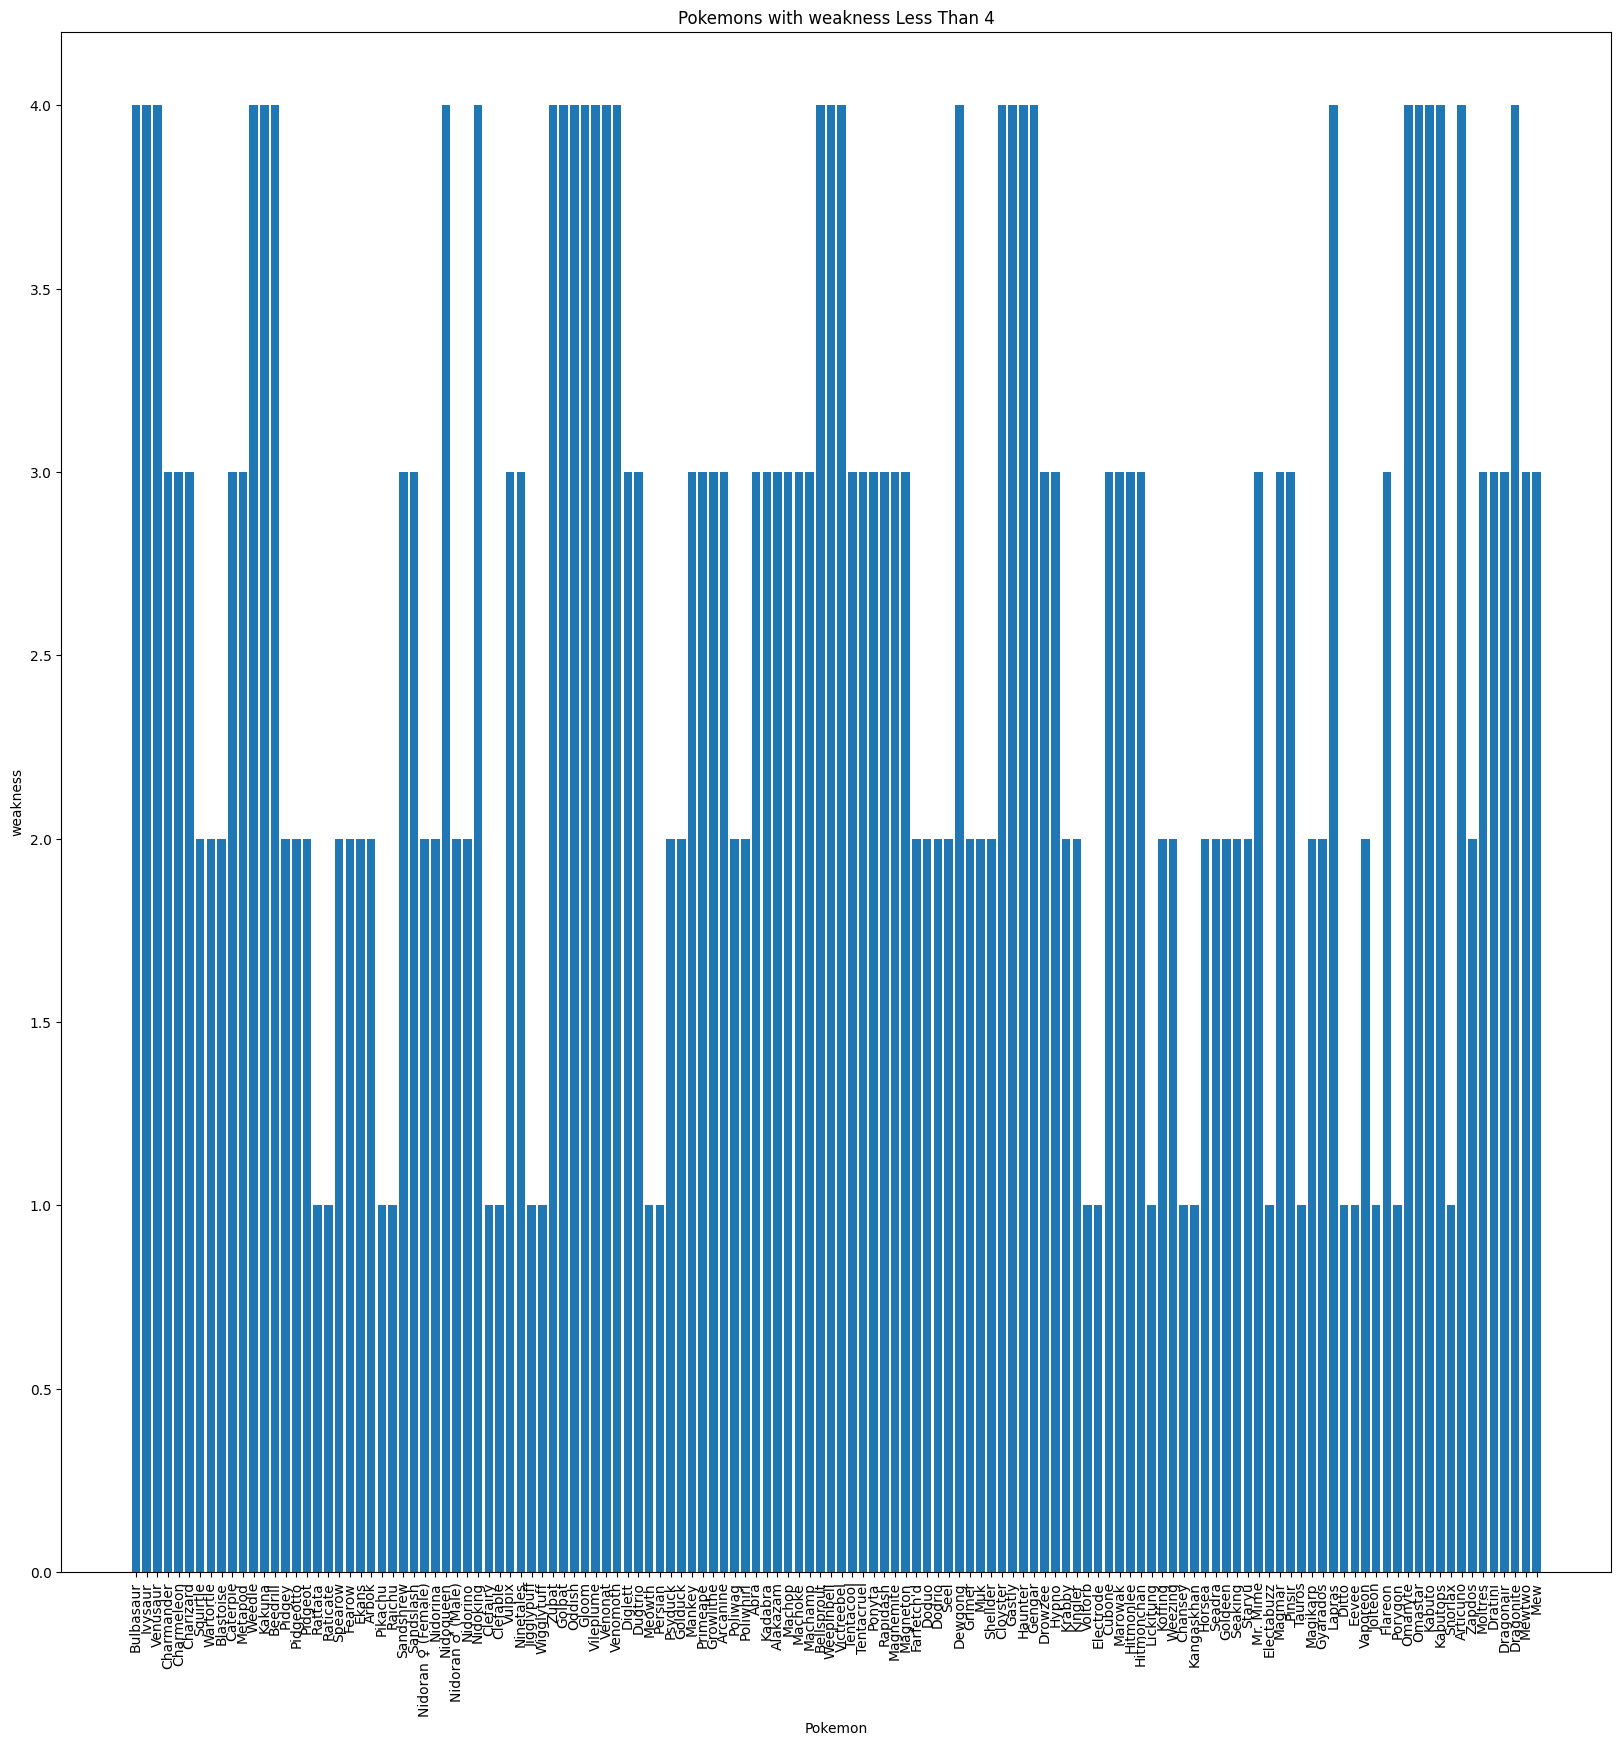

In [11]:
# Plotting the analysis

# Bar plot for weakness less than 4
plt.figure(figsize=(20, 20))
plt.bar(weakness_less_than_4['name'],weakness_less_than_4['weakness'].str.count(',') + 1)
plt.xlabel('Pokemon')
plt.ylabel('weakness')
plt.title('Pokemons with weakness Less Than 4')
plt.xticks(rotation=90)
plt.show()
print("")

In [ ]:
### Get all Pokemons that have no multipliers at all
no_multipliers = df[df['multipliers'].isnull()]

In [14]:
# Get all Pokemons that do not have more than 2 evolutions
less_than_2_evolutions = df[df['next_evolution'].str.count(',') < 2]

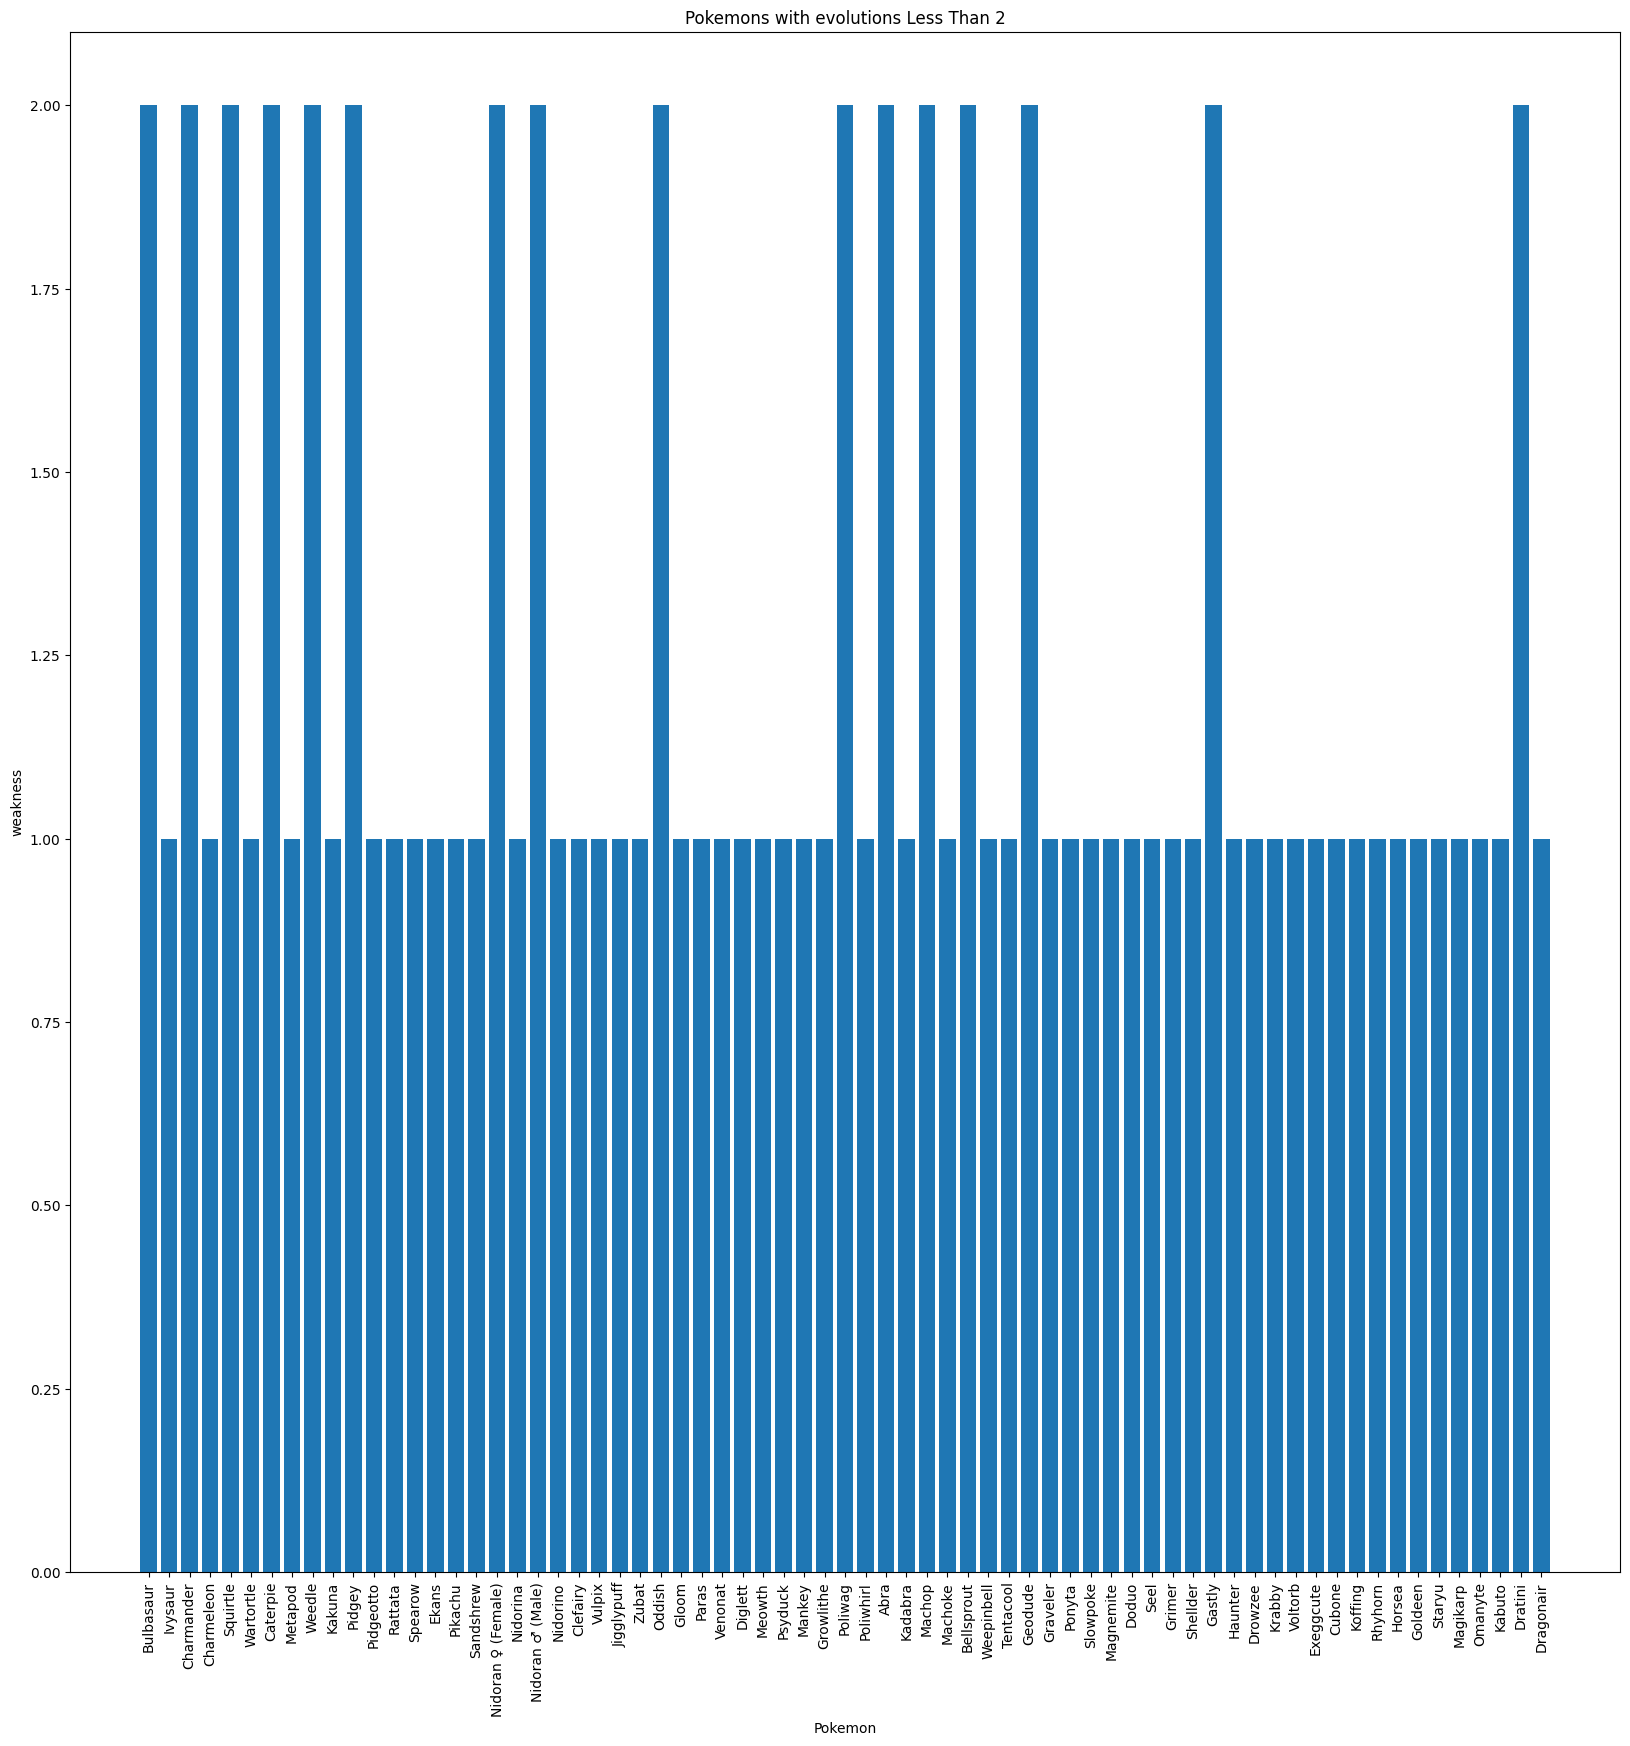

In [16]:
# Bar plot for weakness less than 4
plt.figure(figsize=(20, 20))
plt.bar(less_than_2_evolutions['name'],less_than_2_evolutions['next_evolution'].str.count(',') + 1)
plt.xlabel('Pokemon')
plt.ylabel('weakness')
plt.title('Pokemons with evolutions Less Than 2')
plt.xticks(rotation=90)
plt.show()
print("")

In [32]:
# Convert spawn time to seconds
df['spawn_time_seconds'] = pd.to_datetime(df['spawn_time'], format='%M:%S').dt.minute * 60 + pd.to_datetime(df['spawn_time'], format='%M:%S').dt.second

# Get all Pokemons whose spawn time is less than 300 seconds
spawn_time_less_than_300 = df[df['spawn_time_seconds'] < 300]


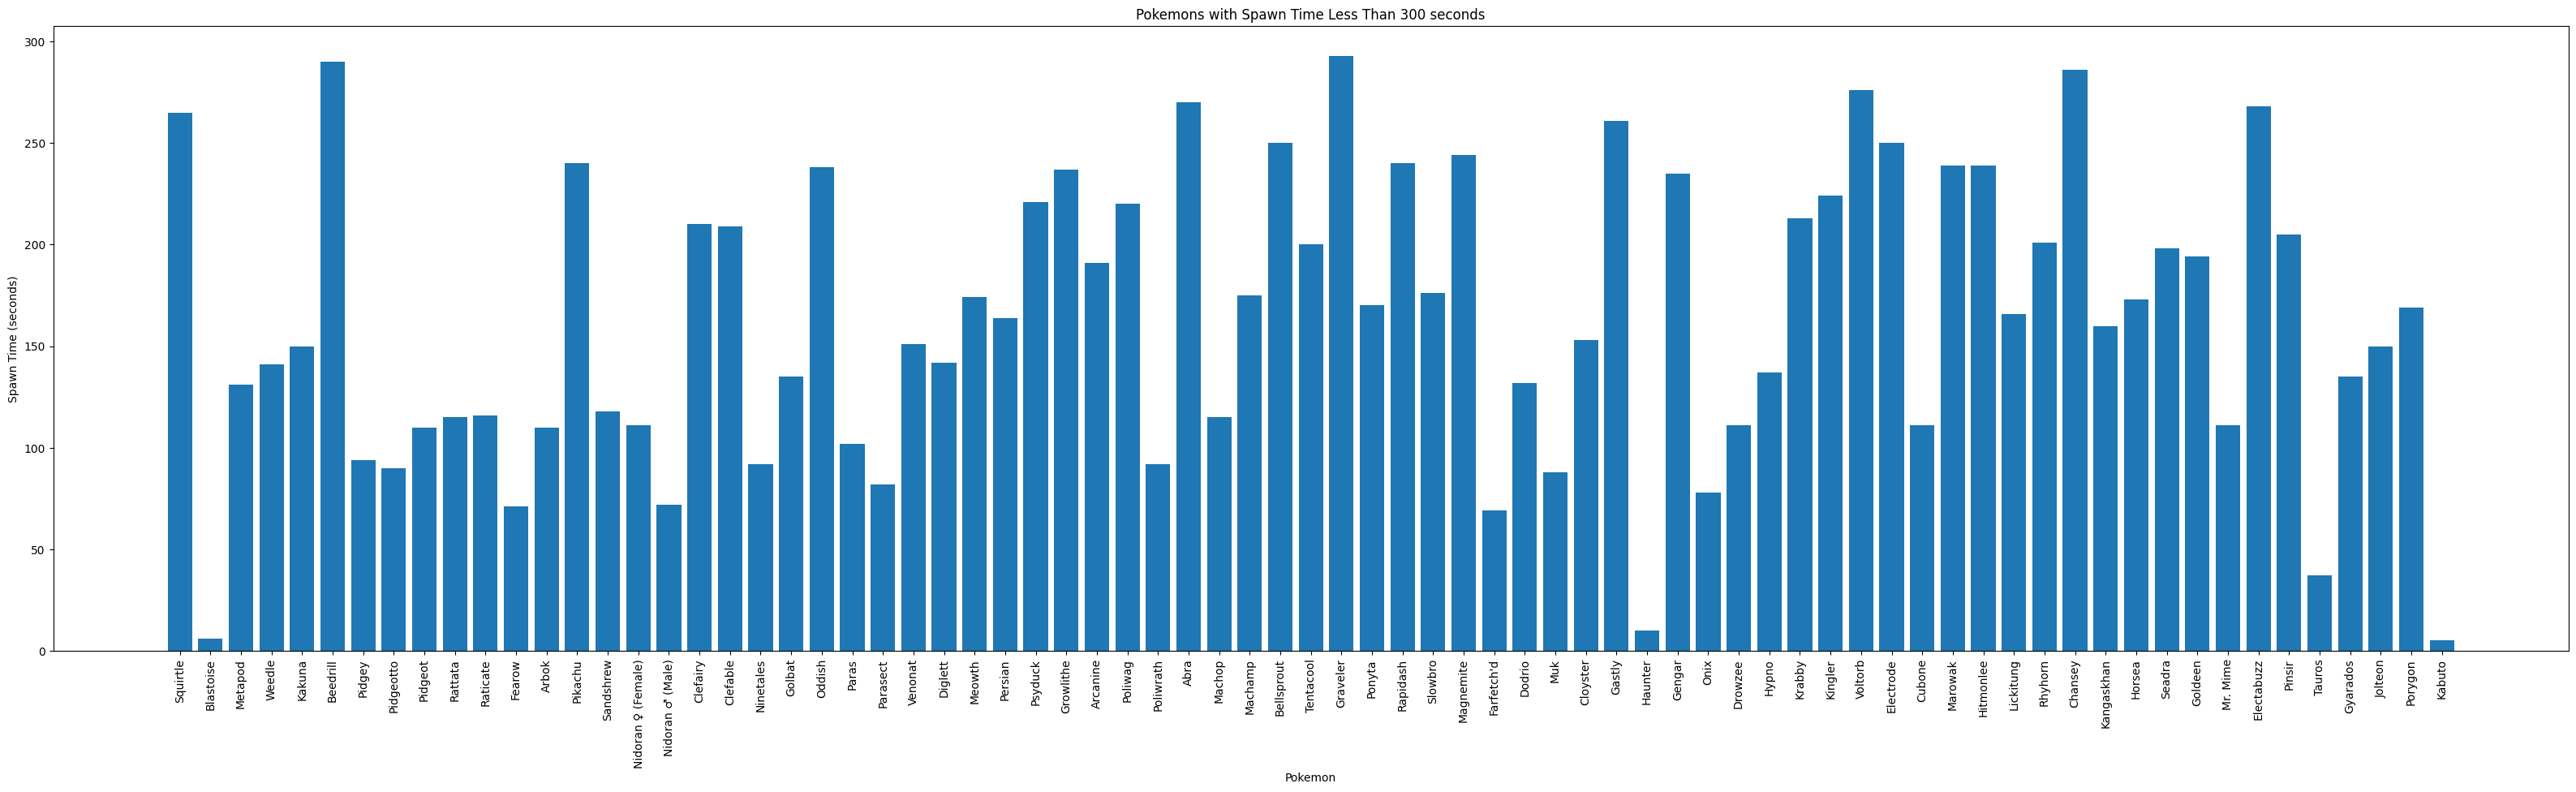

In [33]:
# Bar plot for Pokemons with spawn time less than 300 seconds
plt.figure(figsize=(40, 10))
plt.bar(spawn_time_less_than_300['name'], spawn_time_less_than_300['spawn_time_seconds'])
plt.xlabel('Pokemon')
plt.ylabel('Spawn Time (seconds)')
plt.title('Pokemons with Spawn Time Less Than 300 seconds')
plt.xticks(rotation=90)
plt.show()
print("")

In [24]:

print("f: To Get all Pokemon who have more than two types of capabilities")
print("------------------------------------------------------------------------------------------------------------------------------------------")
def get_pokemon_with_multiple_abilities():
    # Read the Excel file into a pandas DataFrame
    df = pd.read_excel('pokemon_data.xlsx')
    
    # Create a new column to count the number of abilities for each Pokémon
    df['type'] = df['type'].apply(lambda x: len(x.split(', ')))
    
    # Filter the DataFrame to include only the Pokémon with more than two abilities
    filtered_df = df[df['type'] > 2]
    
    # Get the names of the Pokémon with multiple abilities
    pokemon_names = filtered_df['name'].tolist()
    
    return pokemon_names

# Call the function to get the Pokémon with multiple abilities
pokemon_list = get_pokemon_with_multiple_abilities()

f: To Get all Pokemon who have more than two types of capabilities
------------------------------------------------------------------------------------------------------------------------------------------


[]
NO such Pokemon who have more than two types of capabilities


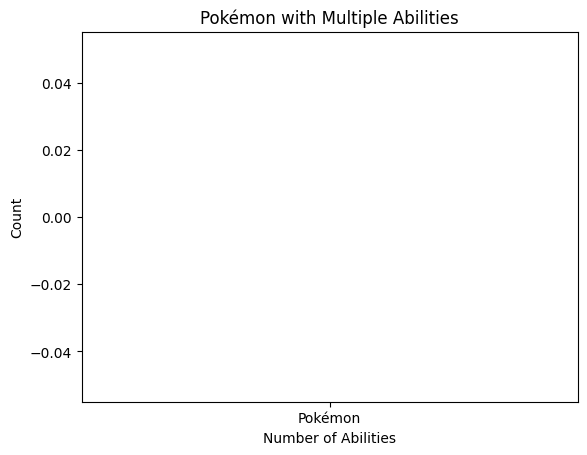

In [25]:
# Print the list of Pokémon with multiple abilities
print(pokemon_list)
if pokemon_list == []:
  print("NO such Pokemon who have more than two types of capabilities")

# Create a bar plot for the count of Pokémon with multiple abilities
plt.bar(['Pokémon'], [len(pokemon_list)])
plt.xlabel('Number of Abilities')
plt.ylabel('Count')
plt.title('Pokémon with Multiple Abilities')
plt.show()